# Part 5: External files

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/0/0a/Python.svg/800px-Python.svg.png" alt="drawing" width="250"/>

## 5.1 Persistence

All the programs that we've seen until now are transient, they run for a short time and produce some output, but when they end, their data disappears.

On the other hand, if we need to keep this data after the execution of the program, we will need **persistent** programs, which keeps some of their data in permanent storage.

For this porpouse you can use two different approaches:
- Usage of external files
- Usage of data bases (not covered in this course)

## 5.2 Working with text files

The **simplest** type of external files are the text ones.

In general, there are 4 steps that a program follows when it works wiht external files:

1. Create it
2. Open it
3. Work with it (read, write, append...)
4. Close it

In Python, first two steps are combined in function `open()`, basically if the file the program is trying to open doesn't exist it will be created and opened (if you specified that it can write), otherwhise just opened:

In [19]:
file = open("HelloWorld.txt", "w")

In [20]:
print(file)

<_io.TextIOWrapper name='HelloWorld.txt' mode='w' encoding='cp1252'>


In [22]:
file.close()

In [5]:
#Take care, the function will only create the file, not the directory!
file = open("Test/HelloWorld.txt", "w")

FileNotFoundError: [Errno 2] No such file or directory: 'Test/HelloWorld.txt'

In [ ]:
#If you don't specify the directory, the file will be created in project's directory.
#If you specify the full path you need to use / or put r before "path"

In [10]:
#Take care, the function will only create the file, not the directory!
file = open("C:\Users\Blasco\Desktop\EventsExample\HelloWorld.txt", "w")

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 2-3: truncated \UXXXXXXXX escape (<ipython-input-10-c41573389310>, line 2)

In [14]:
#Take care, the function will only create the file, not the directory!
file = open("C:/Users/Blasco/Desktop/EventsExample/HelloWorld.txt", "w")
file.close()

In [17]:
#Take care, the function will only create the file, not the directory!
file = open(r"C:\Users\Blasco\Desktop\EventsExample\HelloWorld.txt", "a")
file.close()

You may noticed that there are two parameters in `open()` function. The first one is the path of the text, the second one is the **mode** it should open. You can check all modes in the [function's documentation](https://docs.python.org/3/library/functions.html#open), although here you have the main 3 ones:
- `r`: Stands from read, it's used to allow the program to get information from the file but it can not edit it
- `w`: Stands from write, it's used to allow the program to edit the file, but it can not read it
- `a`: Stands from append, it's used to allow the program to add information at the end of the file

In [5]:
file = open("HelloWorld.txt", "w")
file.write("Hello world")
file.close()

In [48]:
file = open("HelloWorld.txt", "w")
file.writelines(["Hello world","\nThat's my second line"])
file.close()

In [51]:
file = open("HelloWorld.txt", "r")
text = file.read()
file.close()
print(text)

Hello world
That's my second line
Bye bye world


In [50]:
file = open("HelloWorld.txt", "a")
file.write("\nBye bye world")
file.close()

In [52]:
file = open("HelloWorld.txt", "r")
text = file.readlines()
file.close()
print(text)

['Hello world\n', "That's my second line\n", 'Bye bye world']


In [6]:
with open("HelloWorld.txt", "r") as file:
    print(file.read())

Hello world


## 5.2.2 Pointer

Have you tried to read twice the same file? If you do you will notice that the second time it doesn't read anything. That's because when it opens the file (in read mode) it sets the pointer at 0th position and while it reads it moves it to the last position, when you try to read for the second time, the pointer is already in the last position, so there's nothing more to read.

You can reset (or move) the pointer using the `.seek()` method, or specify the position from where the `.read()` method should should start reading.

In [13]:
file = open("HelloWorld.txt", "r")
print(file.read())
print("______")
print(file.read())
file.close()


          Test2
______



In [16]:
type(file)

_io.TextIOWrapper

In [20]:
file = open("HelloWorld.txt", "r")
a = file.read()
b = file.readlines()

print(b)


[]


In [21]:
type(b)

list

In [71]:
file = open("HelloWorld.txt", "r")
print(file.read())
print("______")
file.seek(5)
print(file.read())
file.close()


Hello world
______
 world


In [9]:
file = open("HelloWorld.txt", "r")
print(file.read())
print("______")
file.seek(5)
print(file.read())
file.close()


10

### Exercice: Guessing game

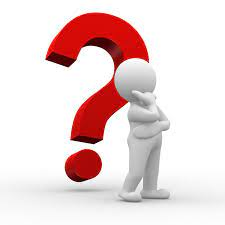

Code a program that plays a guessing game with the user:
1. It needs to read the options from file `GuessingGameOptions.txt`, where each line represents an option
2. Asks the player if he wants to play, if not it ends the execution.
3. Randomly selects an option
4. If so, the program asks the player what he wants to do (clue or guess)
5. While he selects "clue" he can ask if a specific character is contained in the word
6. If he selects "guess" he has to write his guess, if the guess is correct the player scores a point.
7. Asks again if he wants to keep playing (step 3)
8. Once the player stops playing the program has to create a record file called `GuessinggameSocres.txt` with the results.

In [22]:
import random

with open("GuessingGameOptions.txt", "r") as f:
    options = f.readlines()
    
while True:
    
    #Loop to ask player if he wants to continue the game
    while True:
        
        keep_playing = input("Do you want to play another guessing round? [Y/N]").upper()

        #Valid answer, stop asking
        if keep_playing in ["N", "Y"]:
            break
            
        #Force user to answer a valid option    
        else:
            print("Please, select a valid option:\nY: to keep playing.\nN: to exit the game.")
       
    #Stop the game
    if keep_playing == "N":
        break
    
    guess_word = options[random.randint(0,len(options)-1)]
    #Standarize guess word to make it non case sensitive
    guess_word = guess_word.upper().strip()
    
    final_score = 0
    #Loop for guessing game
    while True:
         #Loop to ask player next action
        while True:

            next_action = input("What do you want to do? [Guess/Clue]").upper()

            #Valid answer, stop asking
            if next_action in ["GUESS", "CLUE"]:
                break

            #Force user to answer a valid option    
            else:
                print("Please, select a valid option:\nGuess: to make your final guess.\nClue: ask for another clue.")
                
        if next_action == "CLUE":
            
            clue_question = input("What letter do you wish to know? ")
            
            if clue_question.upper() in guess_word:
                print("{} is in the word".format(clue_question))
            else:
                print("{} isn't in the word".format(clue_question))
                
        else:
            player_guess = input("What's your guess? ")
            
            if player_guess.upper() == guess_word:
                final_score += 1
                print("You win!!!!")
                print("*"*20)
                print("*"*20)
                
            else:
                print("I'm sorry the correct word was {}".format(guess_word))
            break
                

            
with open("GuessingGameResult.txt", "w") as f:
    f.write(str(final_score))
    
print("Thanks for playing!")

Do you want to play another guessing round? [Y/N]Y
What do you want to do? [Guess/Clue]clue
What letter do you wish to know? s
s isn't in the word
What do you want to do? [Guess/Clue]clue
What letter do you wish to know? e
e is in the word
What do you want to do? [Guess/Clue]clue
What letter do you wish to know? a
a isn't in the word
What do you want to do? [Guess/Clue]clue
What letter do you wish to know? b
b is in the word
What do you want to do? [Guess/Clue]guess
What's your guess? Bed
You win!!!!
********************
********************
Do you want to play another guessing round? [Y/N]N
Thanks for playing!


## 5.3 Binary files and serialization


Working with text files is great but it has limited ussage. What if we need to save complex objects, like lists, dictionaries or even custom classes?

If that's the case we need to **serialize** the object we want to save. For that porpouse we use a library called `pickle`.

In [23]:
import pickle

In [24]:
en2esp = {"one":"uno",
          "two":"dos",
          "three":"tres",
          "four":"cuatro"}

In [25]:
#Write
with open("En2esp","wb") as f:
    pickle.dump(en2esp, f)

In [26]:
#Read
with open("En2esp","rb") as f:
    d2 = pickle.load(f)

In [27]:
print(d2)

{'one': 'uno', 'two': 'dos', 'three': 'tres', 'four': 'cuatro'}


## 5.4 Modules

Modules are Python files (*.py* o *.pyc*) that can contain variables, functions, classes or even other modules. They are used to **organize** and **reuse** the code between programs.

It's **easier to mantain** a program that is modularized in multiple files that contains all the code in a huge single file.

- Creating a module is as simple as creating a .py file and create there the objects we want to define.

- To use a module we only need to have the module and the file we're working with in the same directory and use the instruction **import** followed by the name of the module file (without extension): `import mathfunctions`

In [1]:
import math

In [2]:
math.factorial(5)

120

In [3]:
import math as mt

In [4]:
mt.factorial(5)

120

In [5]:
from math import factorial

In [6]:
factorial(5)

120

## 5.5 Share Packages

Packages are *folders* that group modules.

To create them we only have to create a folter with an empty file named **`__init__.py`**, if you want to add subfolders you only need to create the same empty file.

We can make this packages distributable (to share with our teams or use for multiple projects).

1. Create a `setup.py` in the main package folder. In this file we have to fullwill the following code:

```
from setuptools import setup

setup( name= "nameofthepackage",
     version = "1.0",
     description = "Description of the package",
     author = "Our name or team",
     author_email = "lluisbla@gmail.com", #Optional
     url = "our web", #Optional
     packages = ["folder1","folder1.subfolder2"])
```
     
2. With the cmd set your cd in the package's directory and execute the code `python setup.py sdist`
3. This command command should create two folders: `[name].egg-info` and `dist` (this is the important)
4. In the `dist` folder we'll see a `.tar.gz` file, that's the file we need to share and install to use our package from anywhere.
5. To install it we use cmd in the folder and we run the following commnad `pip3 install [file].tar.gz`
6. To uninstall it we can run `pip3 uninstall [package_name]`